In [45]:
import numpy as np
from keras import layers, models
from keras.datasets import reuters

In [46]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [47]:
word_index = reuters.get_word_index()
word_index=dict([(value, key) for (key, value) in word_index.items()])
for _ in train_data[0]:
  print(word_index.get(_ -3))

None
None
None
said
as
a
result
of
its
december
acquisition
of
space
co
it
expects
earnings
per
share
in
1987
of
1
15
to
1
30
dlrs
per
share
up
from
70
cts
in
1986
the
company
said
pretax
net
should
rise
to
nine
to
10
mln
dlrs
from
six
mln
dlrs
in
1986
and
rental
operation
revenues
to
19
to
22
mln
dlrs
from
12
5
mln
dlrs
it
said
cash
flow
per
share
this
year
should
be
2
50
to
three
dlrs
reuter
3


In [48]:
train_labels[0]

3

In [49]:
train_data.shape

(8982,)

In [50]:
#vectorizar: realizar un one hold encoding
def vectorizar(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequences in enumerate(sequences):
    results[i, sequences] = 1
  return results

In [51]:
x_train=vectorizar(train_data)
x_test=vectorizar(test_data)

In [52]:
from keras.utils import to_categorical
y_train=to_categorical(train_labels)
y_test=to_categorical(test_labels)

In [53]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))#permite la clasificacion multiple

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', #categorical_crossentropy
              metrics=['accuracy'])

In [56]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=y_train[:1000]
partial_y_train=y_train[1000:]

#Entrenamiento de modelo de clasificacion multiple

In [57]:
history=model.fit(partial_x_train,
          partial_y_train,
          epochs=14,
          batch_size=512,#lotes de datos
          validation_data=(x_val, y_val))

Epoch 1/14
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step - accuracy: 0.3723 - loss: 3.1728 - val_accuracy: 0.6330 - val_loss: 1.7986
Epoch 2/14
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.6627 - loss: 1.6441 - val_accuracy: 0.7030 - val_loss: 1.3373
Epoch 3/14
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.7394 - loss: 1.2140 - val_accuracy: 0.7330 - val_loss: 1.1606
Epoch 4/14
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.7852 - loss: 1.0011 - val_accuracy: 0.7670 - val_loss: 1.0548
Epoch 5/14
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.8404 - loss: 0.7709 - val_accuracy: 0.7880 - val_loss: 0.9921
Epoch 6/14
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.8604 - loss: 0.6635 - val_accuracy: 0.8040 - val_loss: 0.9315
Epoch 7/14
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.8838 - loss: 0.5507 - val_accuracy: 0.8000 - val_loss: 0.9103
Epoch 8/14
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9004 - loss: 0.4684 - val_accuracy: 0.81

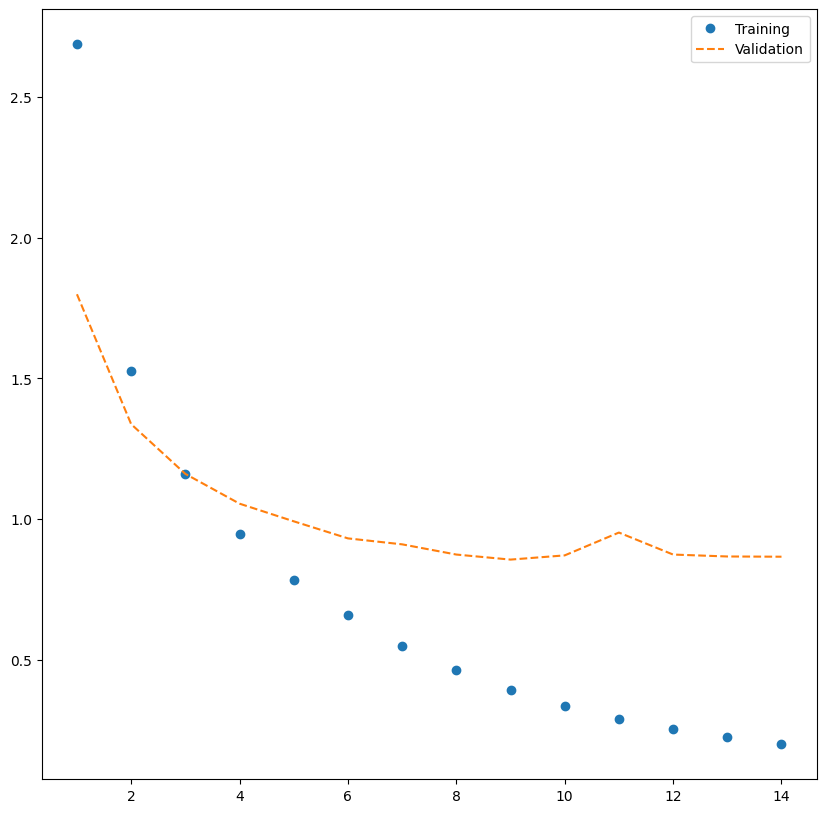

In [58]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
fig=plt.figure(figsize=(10,10))
epochs=range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'o', label='Training')
plt.plot(epochs, val_loss_values, '--', label='Validation')
plt.legend()
plt.show()

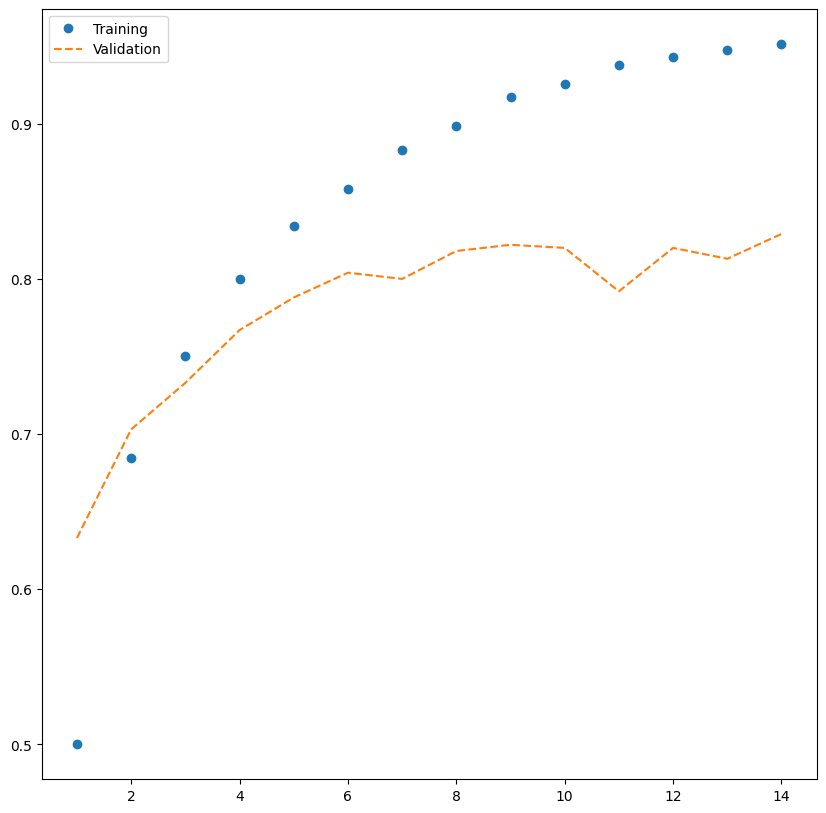

In [59]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['accuracy']
val_loss_values=history_dict['val_accuracy']
fig=plt.figure(figsize=(10,10))
epochs=range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'o', label='Training')
plt.plot(epochs, val_loss_values, '--', label='Validation')
plt.legend()
plt.show()

In [60]:
#epocas en el desempeñño del modelo
model.evaluate(x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8101 - loss: 0.9330


[0.9649533033370972, 0.799198567867279]

In [44]:
predictions=model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [62]:
predictions[0]#existen 46 datos de salida

array([1.4993211e-06, 4.5914221e-05, 1.6368190e-07, 9.8729968e-01,
       1.0528992e-02, 1.2678011e-06, 6.2665933e-08, 4.0094383e-06,
       8.5110549e-04, 1.8226586e-06, 2.8360348e-05, 5.2454113e-04,
       7.3103588e-06, 3.7752416e-05, 8.0935515e-06, 6.1339691e-08,
       4.3083375e-05, 2.2307981e-05, 5.2920319e-07, 6.4042513e-05,
       1.9015024e-04, 1.4321305e-05, 2.9446603e-06, 8.8638089e-06,
       3.1440684e-06, 2.7818226e-07, 8.0170184e-07, 5.1144302e-06,
       3.7890145e-06, 4.7371532e-06, 3.6666713e-06, 7.4017208e-07,
       4.6204855e-06, 9.0332287e-06, 3.2139150e-07, 9.2332442e-07,
       2.2551566e-04, 4.5132492e-06, 4.2976449e-06, 4.1437042e-06,
       4.7943836e-06, 2.5854968e-05, 2.1200251e-06, 1.3743011e-07,
       3.4438668e-07, 4.3237665e-06], dtype=float32)

In [63]:
np.sum(predictions[0])

1.0

In [65]:
np.argmax(predictions[0])#la probabilidad mas alta

3

In [66]:
model = models.Sequential()
model.add(layers.Dense(65, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.75))
model.add(layers.Dense(65, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc']
             )

x_val2 = x_train[:1000]
partial_x_train2 = x_train[1000:]

y_val2 = y_train[:1000]
partial_y_train2 =  y_train[1000:]

history2 = model.fit(partial_x_train2,
                   partial_y_train2,
                   epochs=25,
                   batch_size=512,
                   validation_data=(x_val2,y_val2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - acc: 0.1559 - loss: 3.5336 - val_acc: 0.5220 - val_loss: 2.3485
Epoch 2/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - acc: 0.4553 - loss: 2.3544 - val_acc: 0.5770 - val_loss: 1.7687
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - acc: 0.5250 - loss: 1.9581 - val_acc: 0.6370 - val_loss: 1.5451
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - acc: 0.5818 - loss: 1.7056 - val_acc: 0.6840 - val_loss: 1.4166
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - acc: 0.6237 - loss: 1.5563 - val_acc: 0.6970 - val_loss: 1.3383
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - acc: 0.6315 - loss: 1.5088 - val_acc: 0.7070 - val_loss: 1.2755
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - acc: 0.6664 - loss: 1.3830 - val_acc: 0.7070 - val_loss: 1.2285
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - acc: 0.6715 - loss: 1.3417 - val_acc: 0.7170 - val_loss: 1.1900
Epoch 9/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - acc: 0.6795